# 中国五个城市PM 2.5数据分析

### updated
1. 在本地jupytor完成
1. 环境为py3
1. 前面例子中的城市自己改成了Beijing
1. 增加了isnull().sum()非常方遍直观
1. 其实上一版本在后面写了一个循环，但缺失值的观察在导入成数据之前更好
1. 更新第二个问题的答案的说明：
    1. 按照审批建议的是求出所有城市的平均PM2.5的方式
    1. 我的方式是求出5个城市的数值，好选择一个PM2.5最低的城市
    1. 两段对比代码写在了 ## updated compare 标识的两个代码框中了


## 简介

PM2.5的检测数值通常包含在环境部门和公司的空气质量报告中。 PM2.5是指大气颗粒物（PM），其直径小于或等于2.5微米。在环境科学中，特指悬浮在空气中的固体颗粒或液滴，是空气污染的主要来源之一。


## 项目完成指南


本项目中的数据分析流程和分析中使用的函数已经给出，如果你对Python不是很熟悉，通过前面课程对数据类型和函数的简单掌握，你也可以完成本项目，请不要担心！请将你的重心放到观察数据、提出问题和解答问题上。

> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook


## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。但是在你开始查看数据前，请先思考几个你需要理解的关于PM2.5的问题，例如，如果你是一名环境工作者，你会想要获得什么类型的信息来了解不同城市的环境情况？如果你是一名生活在这个城市的普通人，你可以思考PM 2.5的变化会有什么样的周期性规律？选择什么时段出行空气质量最佳？




## 观察数据

本数据包含有中国五个城市(北京、上海、成都、广州、沈阳)从2010/1/1-2015/12/31的空气和气象数据。数据中的缺失值被标记为NA。数据列名的含义如下：

```
No: 行号
year: 年份
month: 月份
day: 日期
hour: 小时
season: 季节
PM: PM2.5浓度 (ug/m^3)
DEWP: 露点 (摄氏温度) 指在固定气压之下，空气中所含的气态水达到饱和而凝结成液态水所需要降至的温度。
TEMP: Temperature (摄氏温度)
HUMI: 湿度 (%)
PRES: 气压 (hPa)
cbwd: 组合风向
Iws: 累计风速 (m/s)
precipitation: 降水量/时 (mm)
Iprec: 累计降水量 (mm)
```

其中与PM2.5浓度相关的数据包含有多列，其中`PM_US Post` 的数据来源是[US Department of State Air Quality Monitoring Program](http://www.stateair.net/web/post/1/4.html)。其他PM相关的数据来源于中国生态环境部在五个城市设置的不同站点，比如`PM_Xuhui`位于上海市徐汇区，`PM_Dongsihuan`位于北京市的东四环。

本项目中的数据可以从[Kaggle网站](https://www.kaggle.com/uciml/pm25-data-for-five-chinese-cities)上下载到，该数据也被收录于[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities#)。

由于项目难度设定的问题，在后面的分析中我们暂时没有对气象数据的处理和分析，如果同学感兴趣的话可以自行探索。如果你有足够的能力，我们也欢迎你不采用项目模板中的代码，对数据自行进行分析~


**问题 1**：至少写下两个你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。

（问题示例：1. 2012年-2015年上海市PM 2.5的数据在不同的月份有什么变化趋势？2. 哪个城市的PM 2.5的含量较低？）

**答案**：

**第一个问题：**北京2010年和北京2015年的PM2.5的对比。

**第二个问题：**2015年如果从空气质量考察，那个城市PM2.5最好。

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。



## 数据评估

现在是时候由你自己来探索数据了。我们已经将数据文件提供给你，你无需自己进行下载任何其他文件。此数据由五个文件组成，分别为：
```
BeijingPM20100101_20151231.csv,
ChengduPM20100101_20151231.csv,
GuangzhouPM20100101_20151231.csv,
ShanghaiPM20100101_20151231.csv,
ShenyangPM20100101_20151231.csv
```


首先我们先运行下面的代码单元格来加载你将在分析中使用的所有数据包和函数。这些都是在数据分析中常用的第三方库，我们会在后面的正式课程中进行更加细致的教学。

如果处理的数据量特别大时，最好先从数据样本开始。这样更容易检查我们的数据整理步骤是否有效，因为我们完成代码所需的时间将更少。如果我们对整个过程的进展较为满意，那就可以着手整理整个数据集。（注：本数据集的数量并不是特别大，例如50 MB以上，因此我们并未从中提取样本，而是直接对整个数据集进行的分析。）

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
%matplotlib inline

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

以上海数据为例，我们先使用Pandas的read_csv函数导入第一个数据集，并使用head、info、describe方法来查看数据中的基本信息。

In [2]:
Beijing_data = pd.read_csv('BeijingPM20100101_20151231.csv')

In [3]:
Beijing_data.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0

从运行结果可以看出，除了上面提到的数据列之外，上海数据中还包含有`PM_Jingan`和`PM_Xuhui`两个观测站点的数据。并且数据中PM2.5的这三列包含有缺失值“NaN”。

接下来我们可以查看一下数据的缺失情况，以及数据的类型：

In [4]:
Beijing_data.info()
Beijing_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


No                     0
year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
DEWP                   5
HUMI                 339
PRES                 339
TEMP                   5
cbwd                   5
Iws                    5
precipitation        484
Iprec                484
dtype: int64

通过数据中的打印，我们可以看出本数据中包含有整型(int)、浮点型(float)、字符串型(str)等数据的格式。

In [5]:
# print type of python object
print(type(Beijing_data['cbwd'][0]))

<class 'str'>


变量名`PM_US Post`中包含空格，这也可能对我们后续的分析造成一定的困扰。因为大多数命令中，都是默认以空格做为值与值之间的分隔符，而不是做为文件名的一部分。因此我们需要将变量名中的空格改为下划线:

In [6]:
Beijing_data.columns = [c.replace(' ', '_') for c in Beijing_data.columns]
Beijing_data.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US_Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0

其中season的数据类型为int，但实际上season并不是一个数字，而是一个分类变量，我们可以将season中的数值1,2,3,4转换为对应的季节（可以使用Pandas的map方法来实现）：

In [7]:
Beijing_data['season'] = Beijing_data['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})
Beijing_data.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0  Winter        NaN            NaN   
1   2  2010      1    1     1  Winter        NaN            NaN   
2   3  2010      1    1     2  Winter        NaN            NaN   
3   4  2010      1    1     3  Winter        NaN            NaN   
4   5  2010      1    1     4  Winter        NaN            NaN   

   PM_Nongzhanguan  PM_US_Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0

并且通过打印数据的总行数，与上方non-null的数据数量进行对比，我们可以发现一些数据中存在缺失值，以及缺失值的数量。比如`PM_Jingan`中的non-null非空数据行数为24700, 该数据集的总行数为52584条，该数据缺失的条数则为：27884。

说明：下面代码中用到的`dropna()`函数能够删除掉数据中的缺失值。

In [8]:
# print the length of data
print("The number of row in this dataset is ",len(Beijing_data.index))

# calculating the number of records in column "PM_Jingan"
print("There number of missing data records in PM_Dongsi is: ", 
      len(Beijing_data.index) - len(Beijing_data['PM_Dongsi'].dropna()))


The number of row in this dataset is  52584
There number of missing data records in PM_Dongsi is:  27532


In [9]:
obs_list = ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan']
n = 0
while n < len(obs_list):
    missing = len(Beijing_data.index) - len(Beijing_data[obs_list[n]].dropna())
    print (obs_list[n], ',missing', missing,\
           ',missing rate {:.1%}'.format(missing / len(Beijing_data.index)))
    n = n + 1

PM_Dongsi ,missing 27532 ,missing rate 52.4%
PM_Dongsihuan ,missing 32076 ,missing rate 61.0%
PM_Nongzhanguan ,missing 27653 ,missing rate 52.6%


请选择一个你感兴趣的城市数据集，对你的数据进行类似于上方的评估，并回答下面的问题，说明你观察到的信息：

In [10]:
# TO DO: fill in blanks below to load the city's data
city_data = pd.read_csv('BeijingPM20100101_20151231.csv')

In [11]:
city_data.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0

In [12]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


**问题2a**: 你选择的城市数据中包含哪几个PM 2.5的监测点。请说明它们的列名，不需要包含`PM_US Post`.

**答案**：3个
1. Dongsi 东四
2. Dongsihuan 东四环
3. Nongzhanguan 农展馆

**问题2b**: 你选择的城市数据中的哪些列存在缺失值？缺失值的数量分别是多少？

**答案**：除了No，year，month，day，hour，season外的数据都有缺失。其中PM信息缺失最少的是US的，其他的监测点缺失比例较大。所以使用US的进行分析更加合适。

## 数据整理

现在你已使用单个数据集完成了一些探索，是时候更进一步，将所有数据整理到一个文件中并看看你能发现什么趋势。通过describe函数对数据进行查看，我们可以看出几个PM 2.5观察站的统计数据都很接近，经过进一步的分析，我们会能够发现这几个观测站的数据存在有很强的相关关系（**本项目中并未包含，但你可以通过学习后面的统计学课程，自己来完成此部分**）。

因为五个数据文件中都包含`PM_US Post`一列，并且该列的缺失值相对于其他列缺失值较小，因此在下面的分析中我们仅保留该列数据作为PM 2.5的关键数据。在下面的代码中我们也预先对所有城市的season进行了转换，并为数据添加了一个`city`列，便于对不同城市进行对比分析。

其他的气象数据我们暂时先不考虑，如果同学感兴趣的话可以自行分析。



In [13]:
files = ['BeijingPM20100101_20151231.csv',
       'ChengduPM20100101_20151231.csv',
       'GuangzhouPM20100101_20151231.csv',
       'ShanghaiPM20100101_20151231.csv',
       'ShenyangPM20100101_20151231.csv']

out_columns = ['No', 'year', 'month', 'day', 'hour', 'season', 'PM_US Post']

In [14]:
# create a void dataframe
df_all_cities = pd.DataFrame()

In [15]:
# iterate to write diffrent files
for inx, val in enumerate(files):
    df = pd.read_csv(val)
    df = df[out_columns]
    # create a city column
    df['city'] = val.split('P')[0]
    # map reason 
    df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})
    # append each file and merge all files into one
    df_all_cities = df_all_cities.append(df)

In [16]:
# replace the space in variable names with '_'
df_all_cities.columns = [c.replace(' ', '_') for c in df_all_cities.columns]

我们来简单查看一下处理后的数据，观察数据是否符合我们的要求：

In [17]:
df_all_cities.head()

No  year  month  day  hour  season  PM_US_Post     city
0   1  2010      1    1     0  Winter         NaN  Beijing
1   2  2010      1    1     1  Winter         NaN  Beijing
2   3  2010      1    1     2  Winter         NaN  Beijing
3   4  2010      1    1     3  Winter         NaN  Beijing
4   5  2010      1    1     4  Winter         NaN  Beijing

## 数据筛选

接下来我们将会对你在问题1中提出的两个问题进行更进一步的思考。

`df_all_cities`是我们建立的一个包含所有数据的Pandas Dataframe，考虑到我们的分析目标，我们可能会需要提取部分数据来针对我们感兴趣的具体问题进行分析。为了方便大家对数据进行探索，在下面我们定义了一个`filter_data`和`reading_stats`的函数，通过输入不同的条件(conditions),该函数可以帮助我们筛选出这部分的数据。

In [18]:
def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["duration < 15", "start_city == 'San Francisco'"]
    """

    # Only want to split on first two spaces separating field from operator and
    # operator from value: spaces within value should be retained.
    field, op, value = condition.split(" ", 2)
    
    # check if field is valid
    if field not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(field))

    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

In [19]:
def reading_stats(data, filters = [], verbose = True):
    """
    Report number of readings and average PM2.5 readings for data points that meet
    specified filtering criteria.
    """

    n_data_all = data.shape[0]

    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]

    # Compute statistics for PM 2.5 readings.
    pm_mean = data['PM_US_Post'].mean()
    pm_qtiles = data['PM_US_Post'].quantile([.25, .5, .75]).as_matrix()
    
    # Report computed statistics if verbosity is set to True (default).
    if verbose:
        if filters:
            print('There are {:d} readings ({:.2f}%) matching the filter criteria.'.format(n_data, 100. * n_data / n_data_all))
        else:
            print('There are {:d} reading in the dataset.'.format(n_data))

        print('The average readings of PM 2.5 is {:.2f} ug/m^3.'.format(pm_mean))
        print('The median readings of PM 2.5 is {:.2f} ug/m^3.'.format(pm_qtiles[1]))
        print('25% of readings of PM 2.5 are smaller than {:.2f} ug/m^3.'.format(pm_qtiles[0]))
        print('25% of readings of PM 2.5 are larger than {:.2f} ug/m^3.'.format(pm_qtiles[2]))
        seaborn.boxplot(data['PM_US_Post'], showfliers=False)
        plt.title('Boxplot of PM 2.5 of filtered data')
        plt.xlabel('PM_US Post (ug/m^3)')

    # Return three-number summary
    return data

在使用中，我们只需要调用`reading_stats`即可，我们在这个函数中调用了`filter_data`函数，因此并不需要我们直接操作`filter_data`函数。下面是对于该函数的一些提示。

`reading_stats`函数中包含有3个参数：

1. 第一个参数（必须）：需要被加载的 dataframe，数据将从这里开始分析。
2. 第二个参数（可选）：数据过滤器，可以根据这些条件来过滤将要被分析的数据点。过滤器应作为一系列条件提供，每个条件之间使用逗号进行分割，并在外侧使用`""`将其定义为字符串格式，所有的条件使用`[]`包裹。每个单独的条件应该为包含三个元素的一个字符串：`'<field> <op> <value>'`（元素与元素之间需要有一个空格字符来作为间隔），`<op>`可以使用以下任意一个运算符：>、<、>=、<=、==、!=。数据点必须满足所有条件才能计算在内。例如，["city == 'Beijing'", "season == 'Spring'"] 仅保留北京市，季节为春天的数据。在第一个条件中, `<field>`是city，`<op>`是 ==, `<value>`是'Beijing',因为北京为字符串，所以加了单引号，它们三个元素之间分别添加一个空格。最后，这个条件需要使用双引号引用起来。这个例子中使用了两个条件，条件与条件之间使用逗号进行分割，这两个条件最后被放在`[]`之中。
3. 第三个参数（可选）：详细数据，该参数决定我们是否打印被选择的数据的详细统计信息。如果verbose = True，会自动打印数据的条数，以及四分位点，并绘制箱线图。如果verbose = False, 则只会返回筛选后的dataframe，不进行打印。

下面我们会使用上海市2012年-2015年的数据进行举例，探索数据中的一些问题。要获取这部分的数据，我们可以使用下面的函数来实现。

There are 35064 readings (13.34%) matching the filter criteria.
The average readings of PM 2.5 is 52.88 ug/m^3.
The median readings of PM 2.5 is 41.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 26.00 ug/m^3.
25% of readings of PM 2.5 are larger than 67.00 ug/m^3.


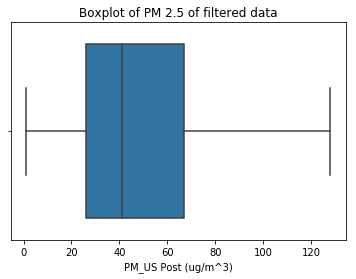

In [20]:
df_test = reading_stats(df_all_cities, ["city == 'Shanghai'", "year >= 2012"])

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
No            35064 non-null int64
year          35064 non-null int64
month         35064 non-null int64
day           35064 non-null int64
hour          35064 non-null int64
season        35064 non-null object
PM_US_Post    33962 non-null float64
city          35064 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 2.1+ MB


从这里的分析我们可以看出，上海市2012-2015年的PM2.5数据有35064条记录，其中PM_US Post站点的记录有33962条，缺失的数量并不是很大。因为Pandas（我们使用的第三方库）在计算统计数字的时候，会自动排除掉缺失的数值，因此在这里我们没有对缺失值进行任何处理。

上海市在2012-2015年期间PM 2.5的值主要分布在0-125 ug/m^3这个区间，平均数值为52.88 ug/m^3，中位数为41.00 ug/m^3，有25%的读数小于26.00 ug/m^3，有25%的读数大于67.00 ug/m^3。

下面请你对你所感兴趣的问题进行分析，并回答下面的问题：（提示: 你需要对前面提出的两个问题都进行思考。）

There are 8760 readings (3.33%) matching the filter criteria.
The average readings of PM 2.5 is 104.05 ug/m^3.
The median readings of PM 2.5 is 79.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 35.00 ug/m^3.
25% of readings of PM 2.5 are larger than 147.00 ug/m^3.


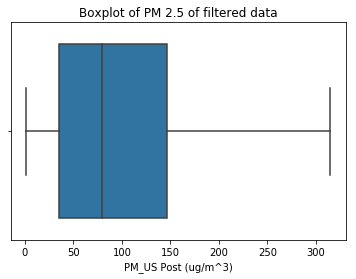

In [22]:
# code to compute answers 1a pm - beijing - 2010
df_bj2010 = reading_stats(df_all_cities, ["city == 'Beijing'", "year == 2010"])

There are 8760 readings (3.33%) matching the filter criteria.
The average readings of PM 2.5 is 82.78 ug/m^3.
The median readings of PM 2.5 is 55.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 22.00 ug/m^3.
25% of readings of PM 2.5 are larger than 109.00 ug/m^3.


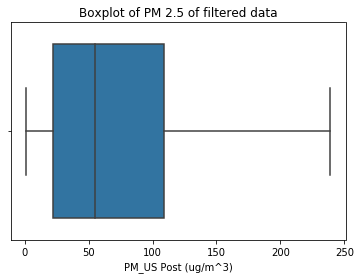

In [23]:
# code to compute answers 1bpm - beijing - 2015
df_bj2015 = reading_stats(df_all_cities, ["city == 'Beijing'", "year == 2015"])

In [24]:
# code to compare city
df_all_cities.groupby('city').mean()

No         year     month        day  hour  PM_US_Post
city                                                                  
Beijing    26292.5  2012.499772  6.523962  15.726609  11.5   95.904241
Chengdu    26292.5  2012.499772  6.523962  15.726609  11.5   83.407612
Guangzhou  26292.5  2012.499772  6.523962  15.726609  11.5   50.803938
Shanghai   26292.5  2012.499772  6.523962  15.726609  11.5   52.910544
Shenyang   26292.5  2012.499772  6.523962  15.726609  11.5   75.837500

**问题3a**: 要回答你前面的提出的两个问题，你需要分别筛选哪部分的数据？请具体说明。

**答案**：

**第一个问题：**根据上面代码，可以看出北京2015年与2010年相比。PM2.5的上限和中位数又了很大改善。虽然我们底子差，可以我们一直在努力的赶脚。此处要使用写好的函数把北京2010和2015年的数据筛选出来进行对比。

**第二个问题：**2015年如果从空气质量考察，那个城市PM2.5最好。这里见最后一个代码段，通过循环调用了5个城市的简要输出数据。根据最优一个代码段。广州是空气最好的城市。

**问题3b**：请使用上面给出的`reading_stats`函数来调用你所需要的数据，请在下面填写合适的条件（conditions）。

**答案**：

**第一个问题：**
1. "city == 'Beijing'", "year == 2010"
1. "city == 'Beijing'", "year == 2015"

**第二个问题：
1. city == all(no filter)
1. groupby('city')
1. .mean()

In [25]:
## updated compare - my solution:
# TO DO: Second question
df_all_cities.groupby('city').mean()

No         year     month        day  hour  PM_US_Post
city                                                                  
Beijing    26292.5  2012.499772  6.523962  15.726609  11.5   95.904241
Chengdu    26292.5  2012.499772  6.523962  15.726609  11.5   83.407612
Guangzhou  26292.5  2012.499772  6.523962  15.726609  11.5   50.803938
Shanghai   26292.5  2012.499772  6.523962  15.726609  11.5   52.910544
Shenyang   26292.5  2012.499772  6.523962  15.726609  11.5   75.837500

There are 43800 readings (16.66%) matching the filter criteria.
The average readings of PM 2.5 is 64.85 ug/m^3.
The median readings of PM 2.5 is 46.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 26.00 ug/m^3.
25% of readings of PM 2.5 are larger than 80.00 ug/m^3.


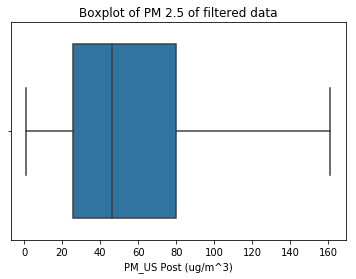

In [26]:
## updated compare - sugguestion:
# TO DO: Second question
df = reading_stats(df_all_cities, ["year == 2015"])

There are 43800 readings (16.66%) matching the filter criteria.
The average readings of PM 2.5 is 64.85 ug/m^3.
The median readings of PM 2.5 is 46.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 26.00 ug/m^3.
25% of readings of PM 2.5 are larger than 80.00 ug/m^3.


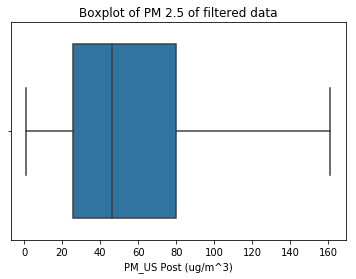

In [27]:
# TO DO: First question
df1 = reading_stats(df_all_cities, ["year == 2015"])

**问题3c**：你获取的数据分别包含多少条记录，统计特征如何？

**答案**：

**第一个问题：**There are 8760 readings (3.33%) matching the filter criteria.

**第二个问题：**不适用

## 数据探索性分析和可视化

得到了想要的数据之后，接下来你可以对数据进行探索性分析和可视化了，并报告你的发现！在这部分我们同样为你提供了一个函数来对PM 2.5的观测平均值制作柱形图的可视化，下面是关于本函数使用方法的一些提示：

1. 第一个参数（必须）：筛选后数据的 dataframe，将从这里分析数据。
2. 第二个参数（必须）：数据分析进行的维度，在这里可以填入一个column_name，比如'season', 'month', 'hour'等，对数据进行分组分析。
3. 第三个参数（可选）：可视化中柱形的颜色，默认为蓝色，你也可以选择你喜爱的其他颜色，比如red，blue，green等。但是请尽量保证一份可视化报告中图表颜色的一致和整洁性。



In [28]:
def univariate_plot(data, key = '', color = 'blue'):
    """
    Plot average PM 2.5 readings, given a feature of interest
    """
    
    # Check if the key exists
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(key))

    # Create plot
    plt.figure(figsize=(8,6))
    data.groupby(key)['PM_US_Post'].mean().plot(kind = 'bar', color = color)
    plt.ylabel('PM 2.5 (ug/m^3)')
    plt.title('Average PM 2.5 Reading by {:s}'.format(key), fontsize =14)
    
    colums_x = ['11', 'Dick', 'Harry', 'Sally']
    plt.xticks(np.arange(len(colums_x)),colums_x)
    
    plt.show()
    return None

我们以上海市2012年之后不同月份的PM 2.5的观测平均值为例，使用`univariate_plot`函数绘制了可视化：

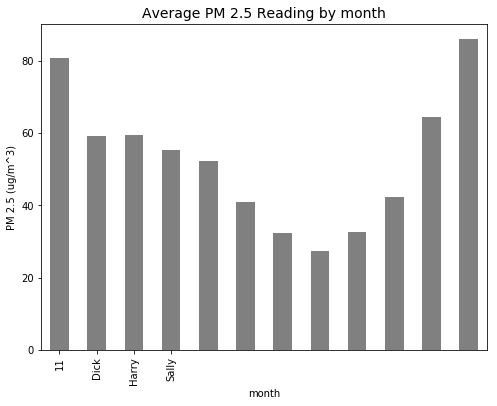

In [29]:
univariate_plot(df_test, 'month', 'grey')

从本可视化中我们可以看出在较温暖的月份（6-10月）空气中的PM 2.5含量较低，而较寒冷的月份，比如（11-1月）空气中的PM 2.5含量较高。

接下来，你可以对你提出的问题进行探索了！请使用上面的函数探索一些不同的变量，并记录你发现的一些趋势。如果你想用其他方式或多个方式探索数据集，可自行创建更多的单元格。

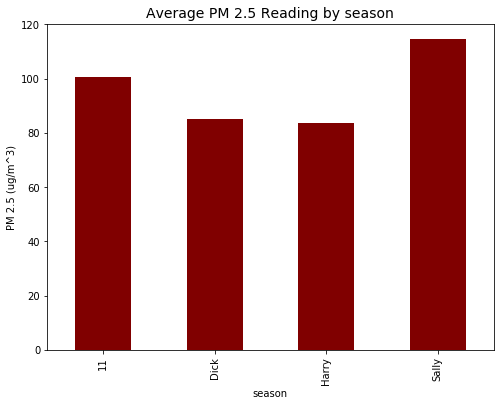

In [30]:
# TO DO: 
# 还是喜欢写名字，对于matplot的颜色名字定义存在了colors.py。应该和css的差不多。
# https://codeday.me/bug/20170512/14680.html
df_beijing = reading_stats(df_all_cities, ["city == 'Beijing'", "year >= 2010"], verbose = False)
univariate_plot(df_beijing, 'season', 'maroon')

**问题 4a**：上述可视化有何有趣的趋势？是否能够回答你的第一个问题？（如果不能，请说明你需要什么信息来帮助你来回答问题）

**答案**：从图中看到北京的平均PM是在下降的，但是趋势不明显，需要更多年份的数据才能比较准确的判断。

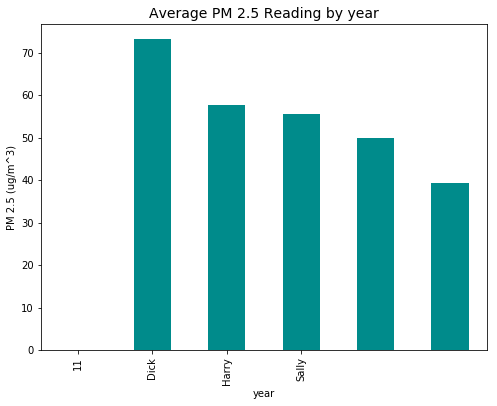

In [31]:
# TO DO: 
df_guangzhou = reading_stats(df_all_cities, ["city == 'Guangzhou'", "year >= 2010"], verbose = False)
univariate_plot(df_guangzhou, 'year', 'darkcyan')

**问题 4b**：上述可视化有何有趣的趋势？是否能够回答你的第二个问题？（如果不能，请说明你需要什么信息来帮助你来回答问题）

**答案**：拿5个城市中mean最小的广州做比较。发现广州不但PM本身更优，且改善力度也最大。另外发现广州并没有2010年的数据。

## 结论

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据到探索数据。通常，在数据分析过程的这个点，你可能想要通过执行统计检验或将数据拟合到一个模型进行预测，来对我们的数据得出结论。还有很多可以对数据执行的潜在分析，但仅靠这里所给的有限代码无法完成。除了结果轴上的PM_US Post的平均值，你还可以观察具有影响的其他特征，如其他站点的PM2.5读数,各种气象数据。我们还未研究过气象数据与PM2.5之间的相关关系。如果你对数据科学方法感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析相关的技能！

**问题 5**：根据目前你对数据分析的了解，请思考一个可以应用数据科学技术的话题或兴趣领域。你希望使用什么样的数据，来得到什么样的信息？

**答案**: 
1. 现在智能手环或者手表比较普及，希望能够通过24小时采集心跳信息，提前预判心脏病的发病。
1. 除了秒机的心跳数据意外，还需要比较多的数据，比如：
    1. 屋内温度
    1. 屋内湿度
    1. 当时位置的天气情况
    1. 当事人运动状态报告
    1. 饮食情况
1. 有了这些数据可能可以得出一些相关性，在高危时间段提醒病人特别注意。

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。

In [32]:
#需要在terminal输入：
#$ ipython nbconvert notebook.ipynb
#或者点击文件菜单栏完成